In [48]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score 
from matplotlib import pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier


In [212]:
import random
random.seed(123456)

In [53]:
iris = pd.read_csv("/Users/belleho/Downloads/IRIS.csv")

In [59]:
train, test = train_test_split(iris, test_size = 0.2)

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica
...,...,...,...,...,...
79,5.7,2.6,3.5,1.0,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica


In [55]:
#encoding the data 
def encode(df):
    df["species"] = le.fit_transform(df["species"])
    return df 

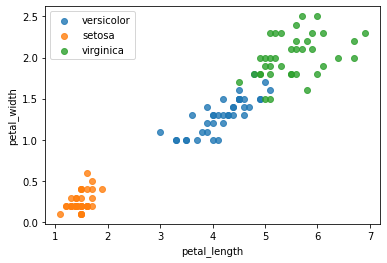

In [60]:
fig, ax = plt.subplots(1) 
ax.set(xlabel = "petal_length", ylabel = "petal_width") 
#  ax.scatter(iris_1['sepal_length'],iris['Culmen Depth (mm)']) 

iris_s = set(train['species']) 
for s in iris_s: 
        label = s.split("-")[1] 
        training_subspecies = train[train['species'] == s] 
        ax.scatter(training_subspecies['petal_length'], training_subspecies['petal_width'],
                   label = label, alpha = 0.8)

ax.legend() 
plt.show()

In [64]:
train = encode(train)
test = encode(test)
train.corr()["species"]

sepal_length    0.774506
sepal_width    -0.450079
petal_length    0.950525
petal_width     0.957517
species         1.000000
Name: species, dtype: float64

In [72]:
#seems like sepal length, petal length, and petal width are the features to go for - model buidling 
X_train_lR = train[train.columns[[0,2,3]]]
y_train_lR = train["species"] 

X_test_lR = test[test.columns[[0, 2, 3]]]
y_test_lR = test["species"] 

In [77]:
best_cv = 0
best_complex = 0
    
for d in np.arange(0.72,0.73,0.0001):
    LR = LogisticRegression(multi_class = 'multinomial', C = d, solver = 'lbfgs', max_iter = 1000)
            
    mean_cv = cross_val_score(LR, X_train_lR, y_train_lR, cv = 10).mean()
        
    if mean_cv > best_cv:
        best_cv = mean_cv
        best_complex = d
            
    ax.scatter(d, mean_cv)
    
    ax.set(title = "Best complexity: "+ str(round(best_complex, 3)), 
           xlabel = "Complexity", ylabel = "CV score")
    
print('Best CV:', np.round(best_cv, 3))

Best CV: 0.95


In [87]:
lR = LogisticRegression(multi_class = "multinomial", C = best_complex, max_iter = 10000)

In [88]:
lR.fit(X_train_lR, y_train_lR)
predictions = lR.predict(X_test_lR)

In [90]:
print("Accuracy on training data: ", np.round(lR.score(X_train_lR, y_train_lR), 3))
mean_cv_lR = np.round(cross_val_score(lR, X_train_lR, y_train_lR, cv = 5).mean(), 3)
print("Mean cross validation: ", mean_cv_lR)
print('Accuracy on test data: {:.2f}'.format(lR.score(X_test_lR, y_test_lR)))
confusion_matrix(predictions, y_test_lR) 

Accuracy on training data:  0.958
Mean cross validation:  0.95
Accuracy on test data: 1.00


array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 12]])

## Deep neural networks 

In [213]:
#maybe we'll try using neural networks. DNN that is. 
X_train_nn = train[train.columns[[0,1,2,3]]]
y_train_nn = train["species"] 

X_test_nn = test[test.columns[[0,1, 2, 3]]]
y_test_nn = test["species"] 

In [227]:
#build the model 
# model = Sequential()

# model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
# model.add(Dense(10, activation='relu', name='fc2'))
# model.add(Dense(3, activation='softmax', name='output'))

# # Adam optimizer with learning rate of 0.001
# optimizer = Adam(lr=0.001)
# model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape = (4,), activation = "relu", name = "h1"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h2"))
model.add(tf.keras.layers.Dense(10, activation = "relu", name = "h3"))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax, name = "output")) 

In [228]:
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

questions: 
- input shape I don't understand
- why did we put 100 units down 
- learning rate too small also causes a drop in performance? 

In [229]:
model.fit(X_train_nn, y_train_nn, epochs = 20)

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 1.3299 - accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 1.0628 - accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.9806 - accuracy: 0.3167
Epoch 4/20
4/4 [==============================] - 0s 1ms/step - loss: 0.9353 - accuracy: 0.3167
Epoch 5/20
4/4 [==============================] - 0s 1ms/step - loss: 0.9040 - accuracy: 0.3167
Epoch 6/20
4/4 [==============================] - 0s 1ms/step - loss: 0.8787 - accuracy: 0.3167
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: 0.8575 - accuracy: 0.3500
Epoch 8/20
4/4 [==============================] - 0s 1ms/step - loss: 0.8378 - accuracy: 0.4583
Epoch 9/20
4/4 [==============================] - 0s 1ms/step - loss: 0.8224 - accuracy: 0.5667
Epoch 10/20
4/4 [==============================] - 0s 1ms/step - loss: 0.8082 - accuracy: 0.5583
Epoch 11/20
4/4 [======================

In [252]:
# predict for the first 10 observations 
pred = model.predict(X_test_nn)

1/1 [==============================] - 0s 15ms/step


In [240]:
print(np.argmax(pred, axis = 1)) #columns 
print(list(y_test_nn[:50]))

[1 2 0 1 2 1 2 2 1 2 2 0 1 2 2 0 2 2 1 1 0 1 2 1 0 2 1 1 1 1]
[1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0]


In [242]:
model.evaluate(X_test_nn, y_test_nn)

1/1 [==============================] - 0s 96ms/step - loss: 0.6139 - accuracy: 0.9000


[0.6139429211616516, 0.8999999761581421]

In [257]:
predict = np.argmax(pred, axis = 1)

In [258]:
confusion_matrix(predict, y_test_nn)

array([[ 5,  0,  0],
       [ 3, 10,  0],
       [ 0,  0, 12]])

In [276]:
dict = {0: "setosa", 1: "versicolor", 2: "virginica"}
for i in predict:
        print("Predicted Class:" + str(i) + " Name:" + str(dict[i]))


Predicted Class:1 Name:versicolor
Predicted Class:2 Name:virginica
Predicted Class:0 Name:setosa
Predicted Class:1 Name:versicolor
Predicted Class:2 Name:virginica
Predicted Class:1 Name:versicolor
Predicted Class:2 Name:virginica
Predicted Class:2 Name:virginica
Predicted Class:1 Name:versicolor
Predicted Class:2 Name:virginica
Predicted Class:2 Name:virginica
Predicted Class:0 Name:setosa
Predicted Class:1 Name:versicolor
Predicted Class:2 Name:virginica
Predicted Class:2 Name:virginica
Predicted Class:0 Name:setosa
Predicted Class:2 Name:virginica
Predicted Class:2 Name:virginica
Predicted Class:1 Name:versicolor
Predicted Class:1 Name:versicolor
Predicted Class:0 Name:setosa
Predicted Class:1 Name:versicolor
Predicted Class:2 Name:virginica
Predicted Class:1 Name:versicolor
Predicted Class:0 Name:setosa
Predicted Class:2 Name:virginica
Predicted Class:1 Name:versicolor
Predicted Class:1 Name:versicolor
Predicted Class:1 Name:versicolor
Predicted Class:1 Name:versicolor


In [278]:
for j in y_test_nn:
        print("Actual Class:" + str(j) + " Name:" + str(dict[j]))


Actual Class:1 Name:versicolor
Actual Class:2 Name:virginica
Actual Class:0 Name:setosa
Actual Class:1 Name:versicolor
Actual Class:2 Name:virginica
Actual Class:1 Name:versicolor
Actual Class:2 Name:virginica
Actual Class:2 Name:virginica
Actual Class:0 Name:setosa
Actual Class:2 Name:virginica
Actual Class:2 Name:virginica
Actual Class:0 Name:setosa
Actual Class:1 Name:versicolor
Actual Class:2 Name:virginica
Actual Class:2 Name:virginica
Actual Class:0 Name:setosa
Actual Class:2 Name:virginica
Actual Class:2 Name:virginica
Actual Class:1 Name:versicolor
Actual Class:1 Name:versicolor
Actual Class:0 Name:setosa
Actual Class:1 Name:versicolor
Actual Class:2 Name:virginica
Actual Class:1 Name:versicolor
Actual Class:0 Name:setosa
Actual Class:2 Name:virginica
Actual Class:0 Name:setosa
Actual Class:1 Name:versicolor
Actual Class:1 Name:versicolor
Actual Class:0 Name:setosa
